In [1]:
state = 'ID' 
year = 2020

In [2]:
import sys, os
src_path = os.path.abspath(os.path.join('..', '..', 'src'))
sys.path.append(src_path)

In [3]:
filepath = '../../dat/' + str(year) + '/'
filename = state + '_county.json'
filename2 = state + '_county.shp'

In [4]:
from read import read_graph_from_json
from epsilon_constraint import*
import networkx as nx

G = read_graph_from_json(state, filepath + filename, year=year)
print(f"The state of {state} has {G._k} districts.")
G._ideal_population = sum(G.nodes[i]['TOTPOP'] for i in G.nodes) / G._k

The state of ID has 2 districts.


In [5]:
#import warm starts
sys.path.append(os.path.abspath('../heuristic'))

from ID_plans_2020 import plans
print(f"Loaded {len(plans)} plans from file.")
warm_starts = plans

Loaded 4 plans from file.


In [6]:
obj_type = 'inverse_Polsby_Popper'
starting_deviation = 0.01 
verbose = True
contiguity = 'lcut'               # {'lcut', 'scf', 'shir'}
warm_start_mode = 'user'          # {'None', 'user', 'refinement'}
warm_starts = warm_starts         # if you have user define warm starts else it is None
time_limit = 7200                 # Time limit in seconds, adjust as needed
multiplier = 0                    # Adjust multiplier as needed
max_B = True                      # If symmetry_breaking is 'orbitope' or you have warm_start, max_B should be True
symmetry_breaking = 'orbitope'    # {None, 'orbitope', 'rsum'}              
sizes = None

In [7]:
print(f"Running epsilon constraint method for state {state}, objective {obj_type}")
print(f"{'#' * 100}\n")
(plans, obj_bounds, deviations) = epsilon_constraint_method(
            G,                 
            obj_type,          
            contiguity,        
            cutoff=None,       
            verbose=verbose,
            warm_start_mode = warm_start_mode,
            warm_starts=warm_starts,  
            starting_deviation=starting_deviation, 
            time_limit=time_limit, 
            sizes=sizes,      
            max_B=max_B,      
            symmetry_breaking=symmetry_breaking, 
        )

Running epsilon constraint method for state ID, objective inverse_Polsby_Popper
####################################################################################################

L = 910358 and U = 928748

****************************************
Trying deviation = 9195.53
****************************************
Using user-provided warm starts.
Selected warm_start = [[1, 6, 13, 15, 19, 20, 21, 22, 24, 29, 34, 35, 38, 39, 41], [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 23, 25, 26, 27, 28, 30, 31, 32, 33, 36, 37, 40, 42, 43]]
Objective value: 8.539806032366492
Deviation: 0.0

****************************************
Running labeling model!
****************************************
L = 910358 and U = 928748
Set parameter Username
Set parameter LicenseID to value 2608266
Academic license - for non-commercial use only - expires 2026-01-09
sizes =  [1, 1]
Solving the max B problem (as MIP) for use in the vertex ordering...
Set parameter LogToConsole to value 0
Set parameter Lazy

     0     0    2.11561    0   55    8.53981    2.11561  75.2%     -    0s
H    0     0                       5.3395614    2.11561  60.4%     -    0s
     0     2    2.13012    0   55    5.33956    2.13012  60.1%     -    0s
H   42    69                       4.4388701    2.97990  32.9%  45.8    0s
H   57    69                       3.7201201    2.97990  19.9%  50.2    0s
H  150    26                       3.5871248    3.24794  9.46%  30.8    0s
*  207     0              12       3.5376872    3.45699  2.28%  26.1    0s

Cutting planes:
  Gomory: 4
  Zero half: 5
  RLT: 2
  Lazy constraints: 21

Explored 212 nodes (6840 simplex iterations) in 0.80 seconds (0.15 work units)
Thread count was 20 (of 20 available processors)

Solution count 6: 3.53769 3.58712 3.72012 ... 8.53981

Optimal solution found (tolerance 0.00e+00)
Best objective 3.537687221525e+00, best bound 3.537687221525e+00, gap 0.0000%

User-callback calls 861, time in user-callback 0.11 sec

**********************************

 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    0.00063    0    2    8.53981    0.00063   100%     -    0s
     0     0    1.44340    0   40    8.53981    1.44340  83.1%     -    0s
     0     0    1.81259    0   46    8.53981    1.81259  78.8%     -    0s
     0     0    2.01587    0   49    8.53981    2.01587  76.4%     -    0s
     0     0    2.04601    0   52    8.53981    2.04601  76.0%     -    0s
     0     0    2.05031    0   52    8.53981    2.05031  76.0%     -    0s
     0     0    2.05431    0   56    8.53981    2.05431  75.9%     -    0s
     0     0    2.05889    0   59    8.53981    2.05889  75.9%     -    0s
     0     0    2.06512    0   54    8.53981    2.06512  75.8%     -    0s
     0     0    2.06513    0   54    8.53981    2.06513  75.8%     -    0s
     0     0    2.06518    0   54    8.53981    2.06518  75.8%     -    0s
     0     0    2.07743    0   55    8.53981    2.07743  75.7%     -    0s
     0     0    2.1121

 112242 20363     cutoff   30         8.53981    5.72057  33.0%  18.7  125s
 118413 20809 infeasible   30         8.53981    5.72057  33.0%  18.8  130s
 123164 21071     cutoff   30         8.53981    5.72057  33.0%  18.8  135s
 128909 21429     cutoff   27         8.53981    5.72057  33.0%  18.9  141s
 133644 21724    7.78166   29    7    8.53981    5.72057  33.0%  19.0  146s
 138533 22059 infeasible   30         8.53981    5.72057  33.0%  19.0  150s
 142852 22269 infeasible   29         8.53981    5.72057  33.0%  19.0  155s
 147603 22363    6.78557   25   22    8.53981    5.72057  33.0%  19.1  160s
 152215 22554    7.73212   27   36    8.53981    5.72057  33.0%  19.1  166s
 155436 22696    7.21535   28   16    8.53981    5.72057  33.0%  19.1  171s
 159910 22807    8.17399   28   10    8.53981    5.72057  33.0%  19.1  176s
 164637 22917    6.82615   23   37    8.53981    5.72057  33.0%  19.1  180s
 170452 22986 infeasible   32         8.53981    5.72057  33.0%  19.2  185s
 175126 2305

     0     0    2.09126    0   50    8.53981    2.09126  75.5%     -    0s
     0     0    2.10007    0   53    8.53981    2.10007  75.4%     -    0s
     0     0    2.11331    0   56    8.53981    2.11331  75.3%     -    0s
     0     0    2.11516    0   56    8.53981    2.11516  75.2%     -    0s
     0     0    2.11917    0   51    8.53981    2.11917  75.2%     -    0s
     0     0    2.11997    0   51    8.53981    2.11997  75.2%     -    0s
     0     0    2.12084    0   54    8.53981    2.12084  75.2%     -    0s
     0     0    2.12482    0   54    8.53981    2.12482  75.1%     -    0s
     0     0    2.12794    0   55    8.53981    2.12794  75.1%     -    0s
     0     0    2.12939    0   55    8.53981    2.12939  75.1%     -    0s
     0     0    2.12939    0   55    8.53981    2.12939  75.1%     -    0s
     0     2    2.14194    0   55    8.53981    2.14194  74.9%     -    0s
  6052  2447    5.76187   27   58    8.53981    4.03271  52.8%  19.4    5s
 19142  6283    6.95539  

     0     0    2.05908    0   51    8.53981    2.05908  75.9%     -    0s
     0     0    2.07431    0   55    8.53981    2.07431  75.7%     -    0s
     0     0    2.07608    0   55    8.53981    2.07608  75.7%     -    0s
     0     0    2.12360    0   58    8.53981    2.12360  75.1%     -    0s
     0     0    2.13930    0   59    8.53981    2.13930  74.9%     -    0s
     0     0    2.14345    0   57    8.53981    2.14345  74.9%     -    0s
     0     0    2.14544    0   57    8.53981    2.14544  74.9%     -    0s
     0     0    2.14590    0   56    8.53981    2.14590  74.9%     -    0s
     0     0    2.15353    0   56    8.53981    2.15353  74.8%     -    0s
     0     0    2.16034    0   56    8.53981    2.16034  74.7%     -    0s
     0     0    2.16116    0   56    8.53981    2.16116  74.7%     -    0s
     0     0    2.16207    0   56    8.53981    2.16207  74.7%     -    0s
     0     0    2.18285    0   59    8.53981    2.18285  74.4%     -    0s
     0     0    2.18588  

 366192 40202    7.08284   30   22    8.53981    6.21818  27.2%  18.1  423s
 368163 40151    7.42721   30   55    8.53981    6.21818  27.2%  18.1  426s
 369688 40138 infeasible   35         8.53981    6.21818  27.2%  18.1  430s
 374157 40145    7.23913   28   94    8.53981    6.21818  27.2%  18.1  436s
 377421 40057    7.80301   33   20    8.53981    6.21818  27.2%  18.1  442s
 379107 40006    6.70941   35   16    8.53981    6.21818  27.2%  18.1  445s
 383185 39956    6.64970   34   63    8.53981    6.21818  27.2%  18.1  452s
 384742 39963 infeasible   34         8.53981    6.21818  27.2%  18.1  455s
 388395 39961    6.72123   26   16    8.53981    6.21818  27.2%  18.1  462s
 390477 39972 infeasible   35         8.53981    6.21818  27.2%  18.1  465s
 393788 39979    7.89441   29   39    8.53981    6.21818  27.2%  18.0  470s
 397741 40065    7.21150   33   35    8.53981    6.21818  27.2%  18.0  478s
 399529 40024     cutoff   32         8.53981    6.21818  27.2%  18.0  480s
 403327 4001


User-callback calls 1416283, time in user-callback 8.13 sec

****************************************
Optimal solution found! Gurobi status: 2
****************************************
[[1, 6, 13, 15, 19, 20, 21, 22, 24, 29, 34, 35, 38, 39, 41], [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 23, 25, 26, 27, 28, 30, 31, 32, 33, 36, 37, 40, 42, 43]]
Deviation is too small, stopping early.


In [8]:
result = list(zip(plans, obj_bounds , deviations))

In [9]:
# Determine the senses for the Pareto frontier
# Minimize the first objective ('deviation').
# Maximize the second objective for compactness types, otherwise minimize it.
senses = ['min', 'max' if obj_type in ['average_Polsby_Popper','bottleneck_Polsby_Popper'] else 'min']
obj_names = ['deviation_persons', obj_type]
infeasible_region = [0, min(round(r[2],1) for r in result)]


####################################################################################################
Pareto Frontier for state ID,  objective inverse_Polsby_Popper
####################################################################################################

Pareto front plans: [[[1, 6, 13, 15, 19, 20, 21, 22, 24, 29, 34, 35, 38, 39, 41], [0, 2, 3, 4, 5, 7, 8, 9, 10, 11, 12, 14, 16, 17, 18, 23, 25, 26, 27, 28, 30, 31, 32, 33, 36, 37, 40, 42, 43]], [[1, 2, 3, 11, 12, 19, 21, 28, 29, 35], [0, 4, 5, 6, 7, 8, 9, 10, 13, 14, 15, 16, 17, 18, 20, 22, 23, 24, 25, 26, 27, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43]], [[1, 2, 11, 12, 15, 21, 24, 33, 34], [0, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 18, 19, 20, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 35, 36, 37, 38, 39, 40, 41, 42, 43]], [[0, 1, 5, 8, 15, 19, 20, 22, 26, 27, 28, 29, 30, 32, 34, 35, 38, 41, 43], [2, 3, 4, 6, 7, 9, 10, 11, 12, 13, 14, 16, 17, 18, 21, 23, 24, 25, 31, 33, 36, 37, 39, 40, 42]], [[1, 2, 11, 12, 15, 20, 

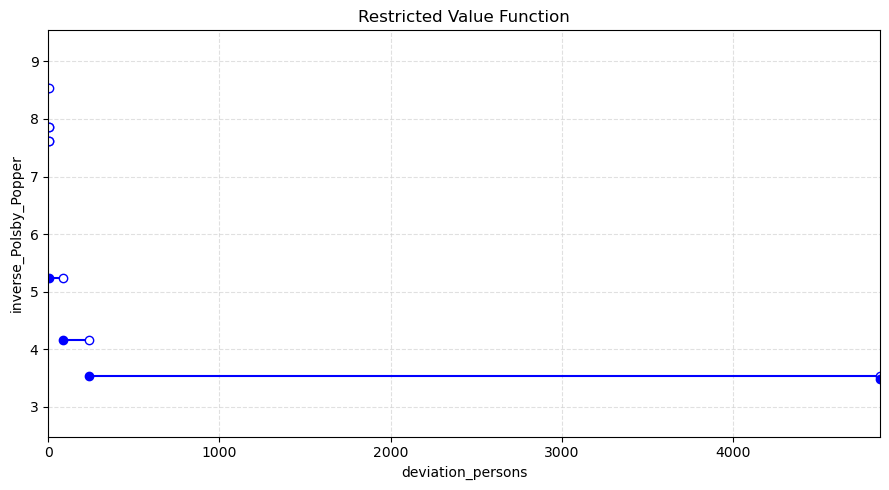

In [10]:
from pareto import ParetoFrontier

print(f"\n{'#' * 100}\nPareto Frontier for state {state},  objective {obj_type}\n{'#' * 100}\n")
pareto = ParetoFrontier(senses, obj_names, state=state, level='county')

if not  plans:
    print("No plan found!")
else:
    for plan, obj_bound, dev in result:
        upper_bound = [dev,  1/obj_bound[0] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[0]]
        lower_bound = [dev,  1/obj_bound[1] if  obj_type == 'bottleneck_Polsby_Popper' else obj_bound[1]]
        
        pareto.add_plan(plan, upper_bound, lower_bound)
            
print("Pareto front plans:", pareto.plans)
print("Pareto front upper bounds:", pareto.upper_bounds)
print("Pareto front lower bounds:", pareto.lower_bounds) 

extra_points = None
extra_colors = None
        
pareto.tighten_lower_bounds()

if infeasible_region[1] > 0.5:
    max_dev = max(upper_bound[0] for upper_bound in pareto.upper_bounds)
    max_obj = max(upper_bound[1] for upper_bound in pareto.upper_bounds)
    min_obj = min(upper_bound[1] for upper_bound in pareto.upper_bounds)
    o1lim=[-1, max_dev+100]
    o2lim=[min_obj*0.9, max_obj*(1.1)]
else:
    o1lim = None
    o2lim = None

pareto.plot_with_custom_x_ranges(method = 'epsilon_constraint_method', 
                                 o1lim=o1lim, o2lim=o2lim, infeasible_region = infeasible_region,
                                 extra_points=extra_points, extra_colors=extra_colors) 


####################################################################################################
Pareto maps for state ID, objective inverse_Polsby_Popper
####################################################################################################



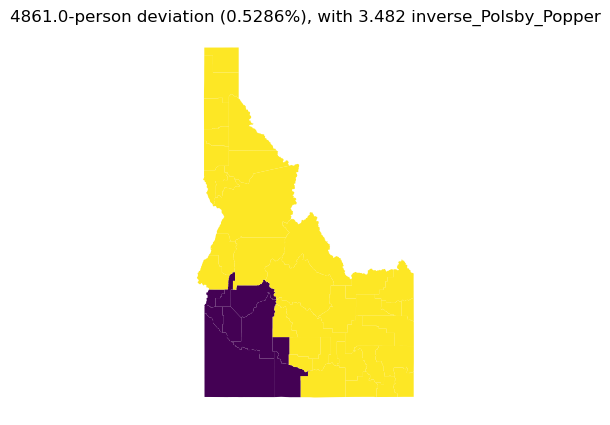

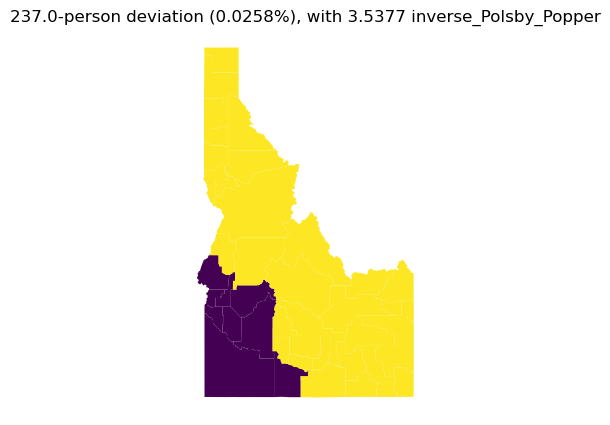

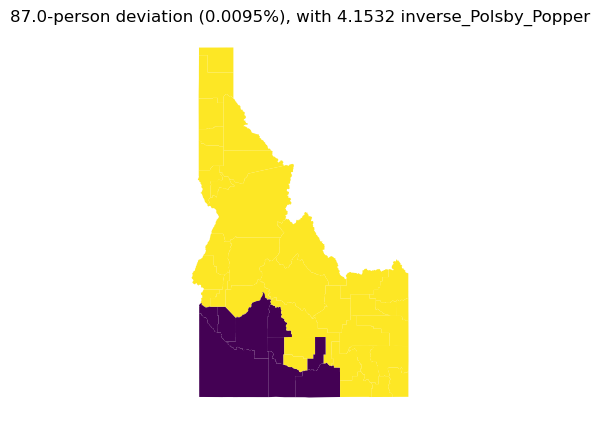

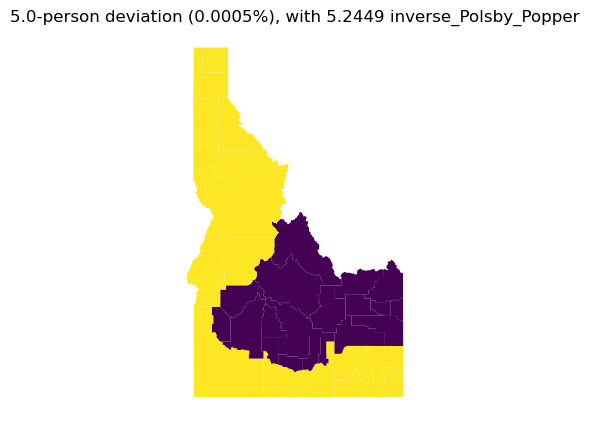

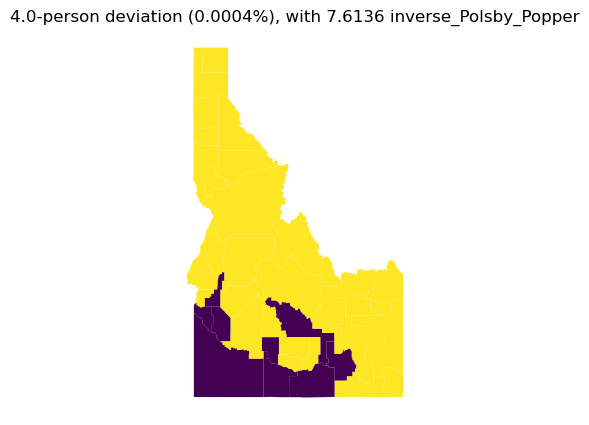

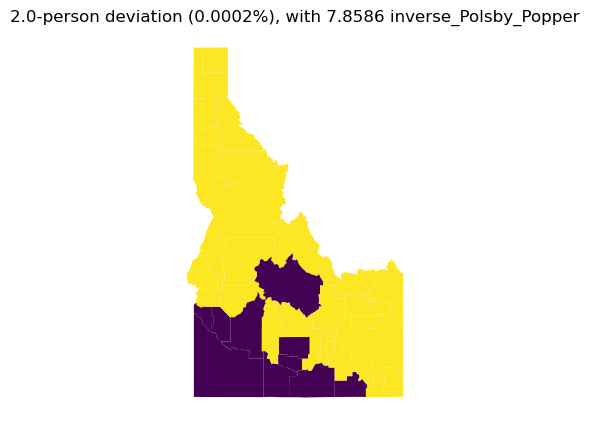

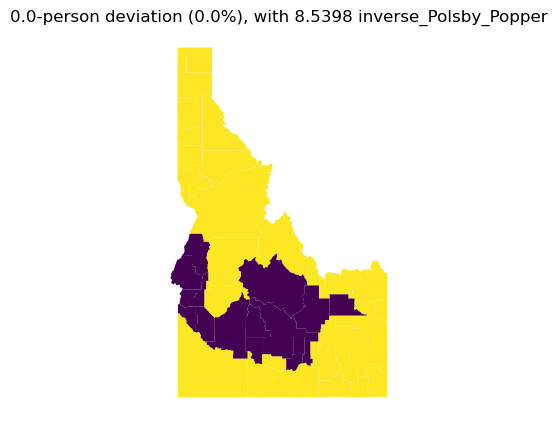

In [11]:
from draw import *

print(f"\n{'#' * 100}\nPareto maps for state {state}, objective {obj_type}\n{'#' * 100}\n")

format_obj = {
    'bottleneck_Polsby_Popper': lambda x: round(1 /x, 4),
    'cut_edges': lambda x: round(x, 0)}

for plan, obj_bound, dev in result:
    ub = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[0])
    lb = format_obj.get(obj_type, lambda x: round(x, 4))(obj_bound[1])
    deviation_percentage = round(100 * dev / G._ideal_population, 4)
    if ub != lb:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), obj_bounds [{ub}, {lb}] {obj_type}"
    else:
        title = f"{round(dev, 2)}-person deviation ({deviation_percentage}%), with {ub} {obj_type}"

    draw_plan(filepath, filename2, G, plan, title=title, year=year)